# Stock 'Adj Close' value prediction

In [1]:
___Author___='LumberJack Jyss'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import stock_data_preprocessing
import datetime as dt
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import seaborn as sns
sns.set(palette='bright',style='whitegrid')
%matplotlib inline

Using TensorFlow backend.


## Stock data function configured to only keep 'Open','High' and 'Adj Close'

In [3]:
def get_stock_data(stock_name,data_source,start,end):
    df = web.DataReader(stock_name,data_source,start,end)
    #df.drop(df.columns[[1,3,4]], axis=1, inplace=True) 
    return df

## Loading STOCK stock data from yahoo.com

In [4]:
data_source = 'yahoo'
stock_name = 'GOOGL'
start = '1970-01-01'
end = dt.date.today()
df = get_stock_data(stock_name,data_source,start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659000.0,50.220219
2004-08-20,54.594593,50.300301,50.555557,54.209209,22834300.0,54.209209
2004-08-23,56.796795,54.579578,55.430431,54.754753,18256100.0,54.754753
2004-08-24,55.855854,51.836838,55.675674,52.487488,15247300.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188600.0,53.053055


In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-14,1144.869995,1123.530029,1142.319946,1124.859985,2019600.0,1124.859985
2019-05-15,1178.300049,1121.400024,1122.550049,1170.800049,2965100.0,1170.800049
2019-05-16,1194.160034,1168.449951,1171.839966,1184.500000,1765400.0,1184.500000
2019-05-17,1186.290039,1166.420044,1175.829956,1168.780029,1266600.0,1168.780029
2019-05-20,1152.160034,1138.135010,1153.000000,1146.385010,589992.0,1146.385010


## Saving the data to a file for a future use

In [6]:
today = dt.date.today()
file_name = stock_name+'_stock_%s.csv' % today
df.to_csv(file_name)

## Let's Normalize it to keep it groovy

In [7]:
data_n = stock_data_preprocessing.normalise_stock_data(df)
data_n.head()

,Ordinal/1e6,Weekday,Adj Volume,Adj Close,Adj Open,Adj High,Adj Low,Normalised Volume,Normalised Close,Normalised Open,Normalised High,Normalised Low
Date,,,,,,,,,,,,
2004-08-19,0.731812,3.0,0.543620,1.000000,0.996612,1.037074,0.956348,0.000000,0.000000,0.000000,0.000000,0.000000
2004-08-20,0.731813,4.0,0.277955,1.079430,1.006677,1.087104,1.001595,-0.722045,0.079430,0.006677,0.087104,0.001595
2004-08-23,0.731816,0.0,0.222226,1.090293,1.103747,1.130955,1.086805,-0.794127,0.010064,0.022528,0.047733,0.006832
2004-08-24,0.731817,1.0,0.185601,1.045147,1.108631,1.112218,1.032191,-0.829770,-0.041408,0.016819,0.020110,-0.053291
2004-08-25,0.731818,2.0,0.111850,1.056408,1.046043,1.076340,1.035280,-0.892982,0.010775,0.000858,0.029846,-0.009440


In [8]:
data_n.tail()

,Ordinal/1e6,Weekday,Adj Volume,Adj Close,Adj Open,Adj High,Adj Low,Normalised Volume,Normalised Close,Normalised Open,Normalised High,Normalised Low
Date,,,,,,,,,,,,
2019-05-14,0.737193,1.0,0.024584,22.398548,22.746216,22.796993,22.372066,-0.998914,-0.010320,0.005041,0.007285,-0.011490
2019-05-15,0.737194,2.0,0.036093,23.313320,22.352552,23.462663,22.329652,-0.998389,0.040841,-0.002054,0.047508,-0.003076
2019-05-16,0.737195,3.0,0.021490,23.586118,23.334028,23.778471,23.266525,-0.999078,0.011701,0.000888,0.019952,-0.002007
2019-05-17,0.737196,4.0,0.015418,23.273097,23.413477,23.621762,23.226104,-0.999346,-0.013271,-0.007320,0.001511,-0.015264
2019-05-20,0.737199,0.0,0.007182,22.827161,22.958881,22.942155,22.662884,-0.999691,-0.019161,-0.013501,-0.014220,-0.026220


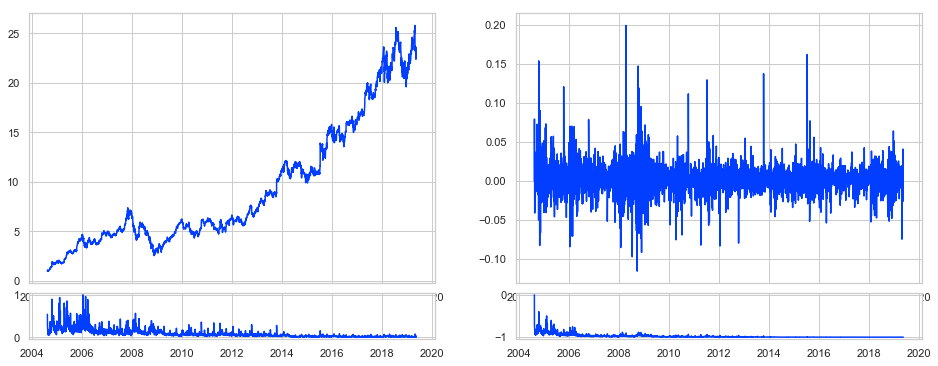

In [10]:
plt.figure(figsize = (16, 6))
stock_data_preprocessing.stock_plot((data_n,))

In [ ]:
## Updated load_data function from lstm.py, configured to accept any amount of features.
## It is set to calculate the last feature as a result.

In [10]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

## Building model functions

In [11]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [ ]:
## Setting X and Y for training and testing

In [12]:
window = 5
X_train, y_train, X_test, y_test = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (3336, 5, 8)
y_train (3336,)
X_test (371, 5, 8)
y_test (371,)


/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


## Loading the model sequence structure

In [13]:
# model = build_model([3,lag,1])
model = build_model2([3,window,1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
/Users/YTsBaCh/Applications/anaconda3/envs/LumberJack/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`


## Executing the model & RMS/RMSE results

In [16]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=500,
    validation_split=0.1)

ValueError: Error when checking input: expected lstm_1_input to have shape (5, 3) but got array with shape (5, 8)

In [19]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00 MSE (0.03 RMSE)
Test Score: 0.00 MSE (0.06 RMSE)


In [20]:
# print(X_test[-1])
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
    #print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))

## Predictions vs Real results

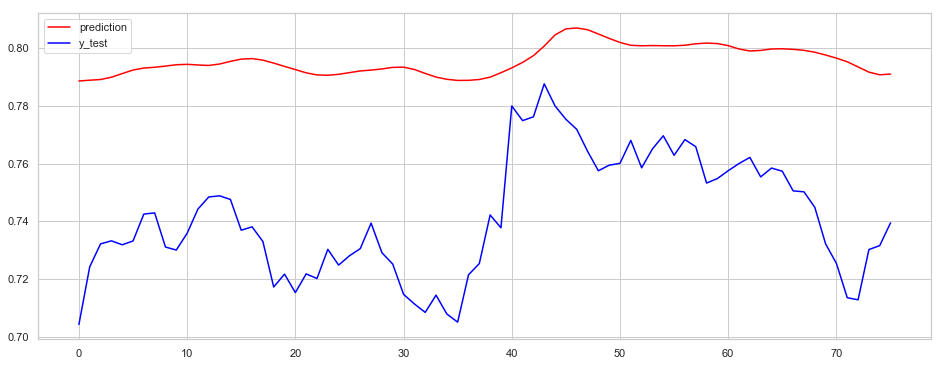

In [23]:
plt.figure(figsize = (16, 6))
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='blue', label='y_test')
plt.legend(loc='upper left')